<div dir=rtl align=center>

<img src='https://upload.wikimedia.org/wikipedia/fa/thumb/a/a9/Sharif_logo.svg/626px-Sharif_logo.svg.png?20110526112825' alt="SUT logo" width=200 height=200 align=center  >
<br>
<font face="B Yekan">
<font color=0F5298 size=7>
Transportation Planning<br>
<font color=2565AE size=5>
Industrial Engineering<br>
<font color=2565AE size=4>

امیرحسین حسنی
 <br>
Student Number:99103803<br>

پارسا بهمنش
 <br>
Student Number:400103205<br>
    
حنانه ملکوتی
 <br>
Student Number:99100903<br>

<font color=3C99D size=5>
Phase 1<br>

    
____

In [5]:
%%html
<marquee style='width:100%; color: blue;'><b> <h1 style="color:black;font-family:tahoma;">Transportation Planning Project Phase 1 </h1></b></marquee>

# Q1

In [200]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [201]:
#calling the data
#file_path ='SeoulBikeData.csv'
data = pd.read_csv('SeoulBikeData.csv',encoding='latin1')

In [202]:
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [203]:
# Convert the 'Date' column to a datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

In [204]:
#Extract hour, season, and day of the week from the 'Date' column
data['Season'] = data['Seasons']
data['DayOfWeek'] = data['Date'].dt.day_name()

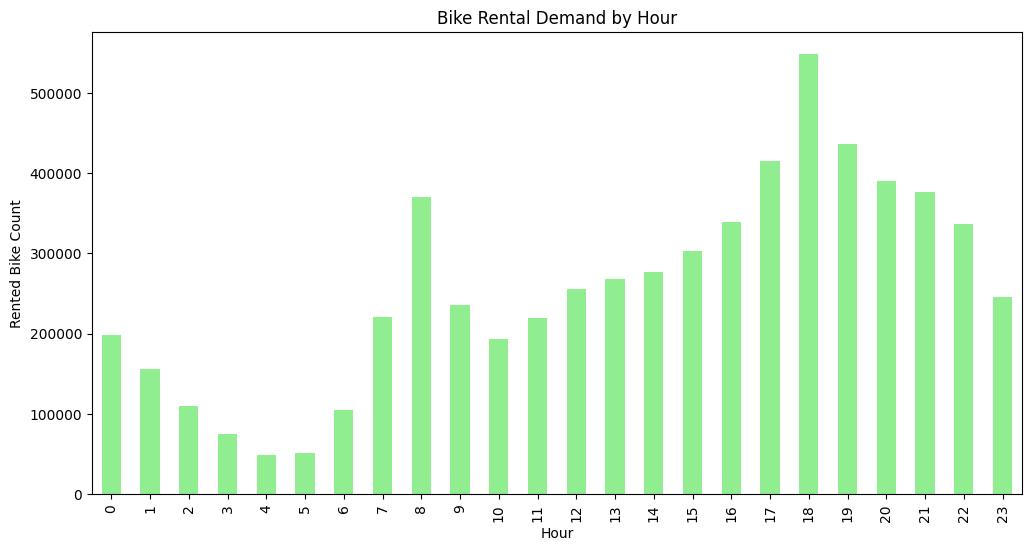

In [205]:
#Plot the distribution of bike rental demand at different hours
plt.figure(figsize=(12, 6))
data.groupby('Hour')['Rented Bike Count'].sum().plot(kind='bar', color='lightgreen')
plt.title('Bike Rental Demand by Hour')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.show()

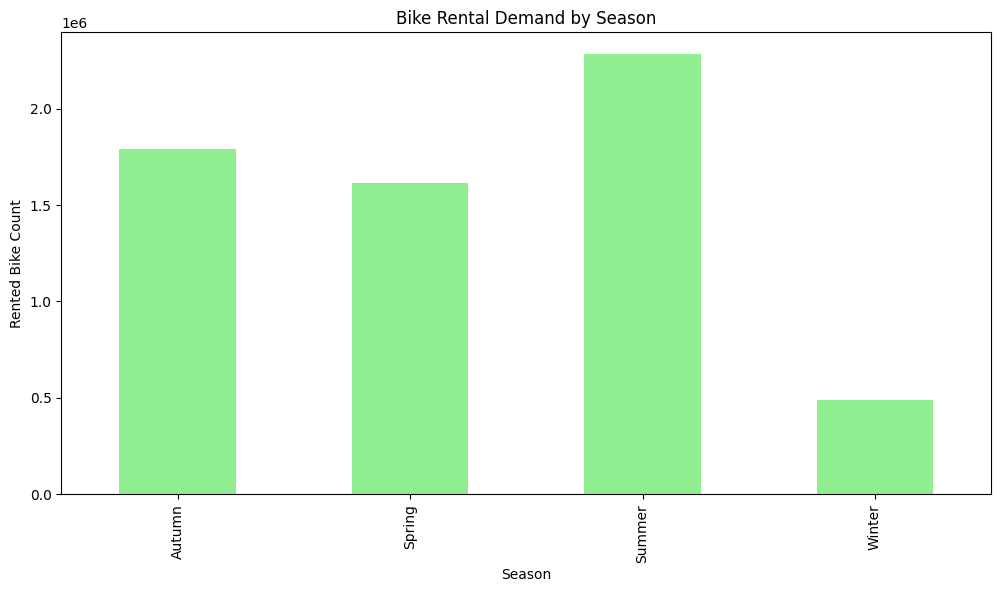

In [206]:
#Plot the distribution of bike rental demand by season
plt.figure(figsize=(12, 6))
data.groupby('Season')['Rented Bike Count'].sum().plot(kind='bar', color='lightgreen')
plt.title('Bike Rental Demand by Season')
plt.xlabel('Season')
plt.ylabel('Rented Bike Count')
plt.show()

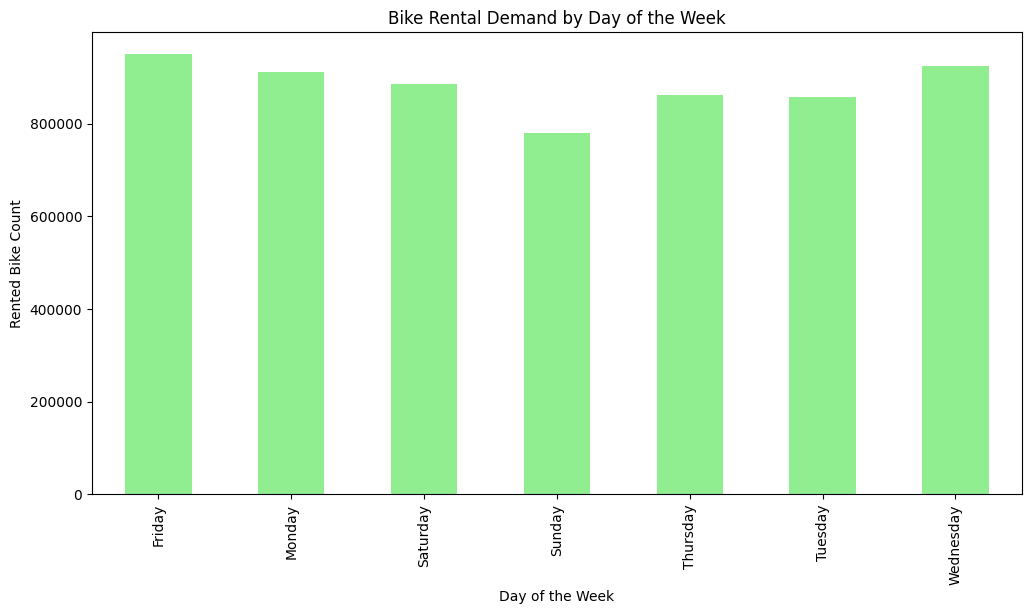

In [207]:
#Plot the distribution of bike rental demand by day of the week
plt.figure(figsize=(12, 6))
data.groupby('DayOfWeek')['Rented Bike Count'].sum().plot(kind='bar', color='lightgreen')
plt.title('Bike Rental Demand by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Rented Bike Count')
plt.show()

As obresved, the Bike rental demand follows an increasing trend in the morning hours,
reaching its peak around 6 PM, and then undergoing a declining trend thereafter.

Regarding the seasons, it can be stated that, as expected, we have the lowest Bike rentals
in winter, reaching their peak in summer. With a relatively small difference compared to summer,
Bike rentals in spring and autumn also show a significant amount.

And at last according to the days of the week, no significant trend is observed, and it can be said
that a uniform distribution has taken place on these days.

# Q2

In [208]:
# Import necessary libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import anderson, ttest_ind, mannwhitneyu, kruskal

In [209]:
df = pd.read_csv('SeoulBikeData.csv',encoding='latin1')

In [210]:
# Segregate data into 'Holiday' and 'Non Holiday' categories
holiday = df[df['Holiday'] == 'Holiday']
nonholiday = df[df['Holiday'] == 'No Holiday']

In [211]:
# Combine the data for visualization
combined_data = pd.concat([holiday.assign(category='Holiday'), nonholiday.assign(category='Non Holiday')])

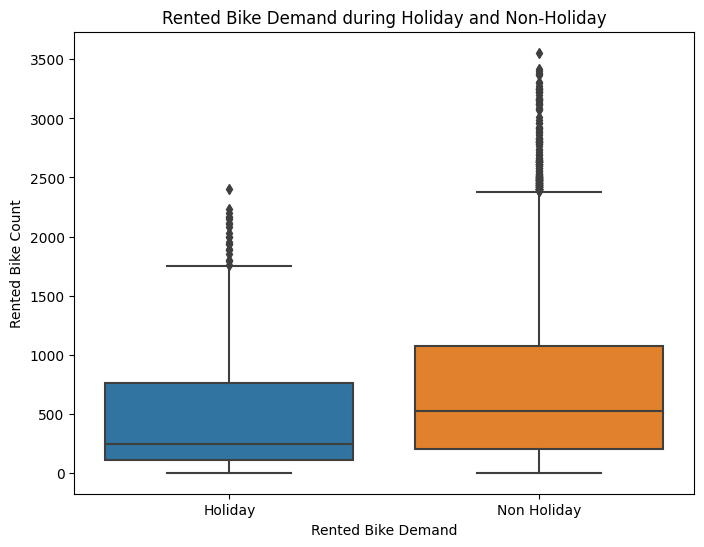

In [212]:
# Create a boxplot to visualize the rented bike demand during holidays and non-holidays
plt.figure(figsize=(8, 6))
sns.boxplot(x='category', y='Rented Bike Count', data=combined_data)
plt.title("Rented Bike Demand during Holiday and Non-Holiday")
plt.xlabel('Rented Bike Demand')
plt.show()

In [213]:
# Perform Anderson-Darling test for normality on both 'Holiday' and 'Non Holiday' data
result_holiday = anderson(holiday['Rented Bike Count'], dist='norm')
result_non_holiday = anderson(nonholiday['Rented Bike Count'], dist='norm')

In [214]:
# Display the Anderson-Darling test results for normality
print("Anderson-Darling test results for 'Holiday' data:", result_holiday)
print("Anderson-Darling test results for 'Non Holiday' data:", result_non_holiday)

Anderson-Darling test results for 'Holiday' data: AndersonResult(statistic=35.04341565159791, critical_values=array([0.571, 0.65 , 0.78 , 0.91 , 1.082]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=499.75694444444446, scale=570.7727685479853)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Anderson-Darling test results for 'Non Holiday' data: AndersonResult(statistic=284.15255864461506, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=715.2280259365995, scale=646.8791242686107)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


As it is evident, the statistics for holiday data are 35.04 and for non-holiday data are 284.15. Additionally, critical values at various significance levels (15%, 10%, 5%, 2.5%, and 1%) for holidays are [0.571, 0.65, 0.78, 0.91, 1.082], and for non-holidays are [0.576, 0.656, 0.787, 0.918, 1.091]. The Anderson-Darling test statistic indicates the extent of deviation of the data from the tested distribution. Values greater than the critical values indicate that the data significantly deviate from the normal distribution. In other words, if the test statistic is greater than the critical values, the hypothesis that the data are drawn from a specific distribution is rejected, indicating a lack of conformity of the data with that distribution. These circumstances have occurred for both categories, indicating that these data do not follow a normal distribution. Therefore, we proceed to perform the Kruskal-Wallis test.

In [215]:
# Perform Kruskal-Wallis test to assess statistical differences between 'Holiday' and 'Non Holiday' data
statistic, p_value = kruskal(holiday['Rented Bike Count'], nonholiday['Rented Bike Count'])
print("Kruskal-Wallis statistic:", statistic)
print("p-value from Kruskal-Wallis test:", p_value)

Kruskal-Wallis statistic: 71.88620616350373
p-value from Kruskal-Wallis test: 2.279719910503349e-17


The statistic value is 71.886 and the p-value is 2.279e-17.
The small p-value indicates that the probability of observing such differences is either very close to zero or extremely low. In fact, this extremely small value suggests strong statistical evidence to reject the null hypothesis, which assumes that all groups are drawn from the same distribution, and to support the existence of significant differences among the groups. Therefore, considering the very small p-value, it can be concluded that there is a significant difference between the rental bike demand data during holidays and non-holidays.

In [216]:
%%html
<marquee style='width:100%; color: blue;'><b> <h1 style="color:black;font-family:tahoma;">Question #3&4 </h1></b></marquee>

To select suitable variables and implement requested models in the next section, one of the main challenges is the proper utilization of categorical variables. To utilize these variables in the model, we need to employ techniques such as one-hot encoding, label encoding, or cyclical encoding for cyclic data like time.<br><br>


To achieve the best model, we need to explore various scenarios and arrive at the correct outcome in this regard:

For the time variable, we know that we should use dummy variables or cyclical encoding, which will have the following scenarios:
<br>1- Using 23 dummy variables
<br> 2- Using 3 dummy variables (to prevent overfitting in the linear model)
<br>These mentioned cases are solely for the linear model, where there's a risk of overfitting. For Random Forest, however, we'll utilize the first scenario.<br><br>

Furthermore, due to the correlation between seasons and months, there are two potential scenarios:
<br>1- Using 3 dummy variables for different seasons
<br>2- Using 11 dummy variables for different months

Thus, in total, 6 different scenarios will be tested for the linear model, and for the Random Forest model, two different models will be used. It's important to note that all these tests for the linear model will be performed after correlation analysis and Lasso method implementation.

Different days of month, where approximately same based on Question #1, thus, we totally omit them  from our dataset


For the ARIMA model, only the time series and the target variable will be utilized.

In [217]:
#Calling Needed Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [218]:
#Calling our Data
data = pd.read_csv('SeoulBikeData.csv',encoding='latin1')

In [219]:
#Converting Date to DateTime
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

In [220]:
#Cheking For Duplicate Datas
print(len(data[data.duplicated()]))

0


In [221]:
#Checking For Null Value Existence
Column_Data=pd.DataFrame(index=data.columns)
Column_Data['UniqueValues'] = data.nunique()
Column_Data['NullValues'] = data.isnull().sum()
Column_Data['DataType'] = data.dtypes
Column_Data['NullPercentage'] = (Column_Data['NullValues']/len(data))*100

In [222]:
Column_Data

,UniqueValues,NullValues,DataType,NullPercentage
Date,365,0,datetime64[ns],0.0
Rented Bike Count,2166,0,int64,0.0
Hour,24,0,int64,0.0
Temperature(°C),546,0,float64,0.0
Humidity(%),90,0,int64,0.0
Wind speed (m/s),65,0,float64,0.0
Visibility (10m),1789,0,int64,0.0
Dew point temperature(°C),556,0,float64,0.0
Solar Radiation (MJ/m2),345,0,float64,0.0
Rainfall(mm),61,0,float64,0.0


No concern about null values

In [223]:
#Comparing Number of Rental Bikes on Functioning and non-Functioning Days
data.groupby('Functioning Day').sum(['Rented Bike Count'])

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Functioning Day,,,,,,,,,,
No,0,3333,4747.4,17846,500.6,448855,2292.2,178.41,40.2,0.0
Yes,6172314,97407,108107.0,492216,14609.6,12137739,33394.4,4807.00,1262.3,657.6


Rented Bike Count is Only given in Functioning Days, Thus Records that belongs to non-Functioning Days should be omitted and also there would be no need to this column.

In [224]:
#Omitting records of non-functioning days
data=data.drop(data[data['Functioning Day'] == 'No'].index)

In [225]:
#Omitting functioning date column
data=data.drop(['Functioning Day'], axis = 1)

Now we want to divide our date to Year, Month and Days. but we will need our datetimes in the next questions, thus here we create our time-series data for ARIMA analysis and then continue our analysis here. And also for a better analysis, we can have days of the week, as a feature.

In [226]:
# Combine 'Date' and 'Hour' columns into a new datetime column
data['DateTime'] = data['Date'] + pd.to_timedelta(data['Hour'], unit='h')
data['DayOfWeek'] = data['Date'].dt.day_name()

#Creating Time-Series Table
dfArima=data.copy()

dfArima.set_index('DateTime', inplace=True)
dfArima = dfArima[['Rented Bike Count']]

data=data.drop(['DateTime'], axis = 1)

dfArima

,Rented Bike Count
DateTime,
2017-12-01 00:00:00,254
2017-12-01 01:00:00,204
2017-12-01 02:00:00,173
2017-12-01 03:00:00,107
2017-12-01 04:00:00,78
...,...
2018-11-30 19:00:00,1003
2018-11-30 20:00:00,764
2018-11-30 21:00:00,694


In [227]:
#Dividing Date
data['Day']=data['Date'].dt.day
data['Month']=data['Date'].dt.month
data['Year']=data['Date'].dt.year
#Omitting Main Date Column
data.drop(columns=['Date'],inplace=True)


In [228]:
data.dtypes

Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
DayOfWeek                     object
Day                            int64
Month                          int64
Year                           int64
dtype: object

# Condition #1: 23 Dummies For Hour, Season Based

In [229]:
#Dummies
data1=pd.get_dummies(data, columns=['Seasons', 'Holiday','DayOfWeek','Year','Hour'], drop_first=True, dtype=int)

In [230]:
data1.dtypes

Rented Bike Count              int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Day                            int64
Month                          int64
Seasons_Spring                 int64
Seasons_Summer                 int64
Seasons_Winter                 int64
Holiday_No Holiday             int64
DayOfWeek_Monday               int64
DayOfWeek_Saturday             int64
DayOfWeek_Sunday               int64
DayOfWeek_Thursday             int64
DayOfWeek_Tuesday              int64
DayOfWeek_Wednesday            int64
Year_2018                      int64
Hour_1                         int64
Hour_2                         int64
Hour_3                         int64
Hour_4                         int64
Hour_5                         int64
H

In [231]:
data1=data1.drop(['Month','Day'], axis = 1)

In [232]:
data1.head(10)

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,254,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
5,100,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
6,181,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
7,460,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
8,930,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
9,490,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

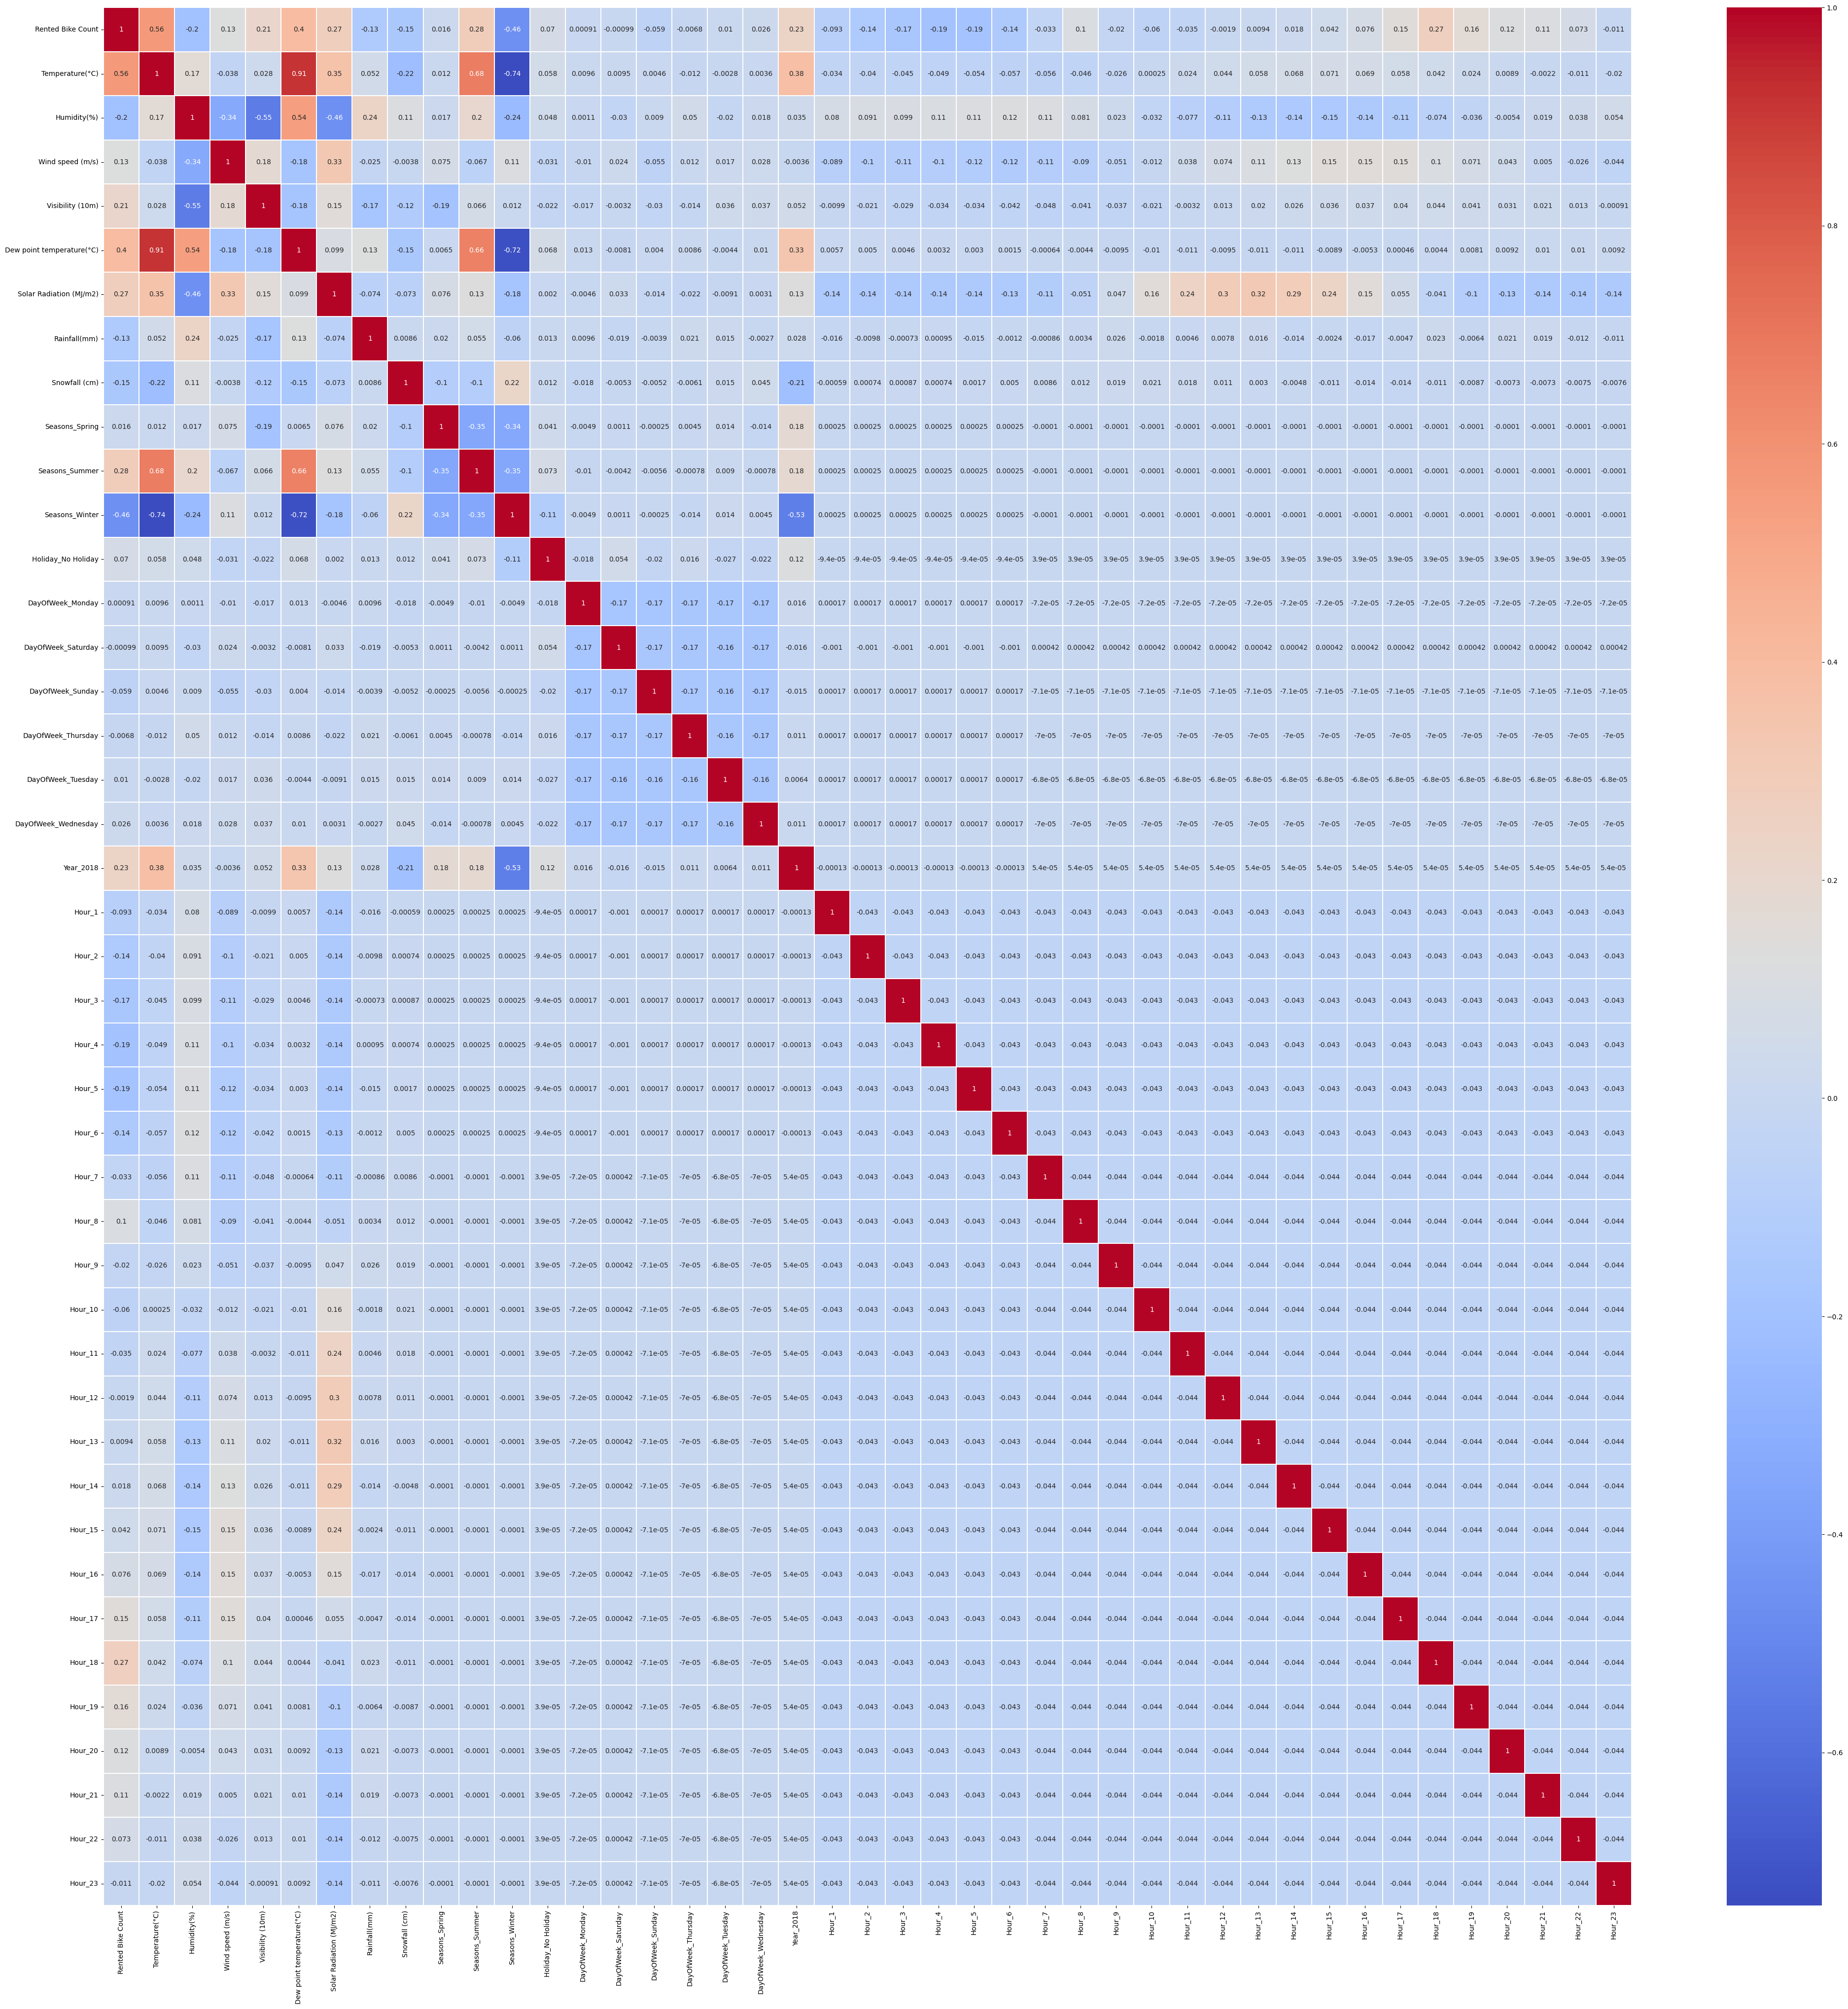

In [233]:
data1_corr= data1.corr()
plt.figure(figsize=(50,50))

#cmap use for colour palette , linewidths : set the width of the lines that divide the cells,
#annot :helps in annotating the heatmap with values if set to True, otherwise values are not provided , linecolor : helps in setting the color of each line that divides heatmap cells
sns.heatmap(data1_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

Temperature and Dew point have high correlation and also, temperature has a higher correlation with target value, thus we omit Dew point from our dataset here.

In [234]:
data1=data1.drop(['Dew point temperature(°C)'], axis = 1)

In [235]:
features1 = data1.columns[data1.columns != 'Rented Bike Count']

In [236]:
features1list=data1[features1].columns.tolist()
features1list

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter',
 'Holiday_No Holiday',
 'DayOfWeek_Monday',
 'DayOfWeek_Saturday',
 'DayOfWeek_Sunday',
 'DayOfWeek_Thursday',
 'DayOfWeek_Tuesday',
 'DayOfWeek_Wednesday',
 'Year_2018',
 'Hour_1',
 'Hour_2',
 'Hour_3',
 'Hour_4',
 'Hour_5',
 'Hour_6',
 'Hour_7',
 'Hour_8',
 'Hour_9',
 'Hour_10',
 'Hour_11',
 'Hour_12',
 'Hour_13',
 'Hour_14',
 'Hour_15',
 'Hour_16',
 'Hour_17',
 'Hour_18',
 'Hour_19',
 'Hour_20',
 'Hour_21',
 'Hour_22',
 'Hour_23']

In [237]:
x1 = data1[features1]
y1 = data1['Rented Bike Count']

In [238]:
#Calling needed libraries for Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

In [239]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x1, y1, test_size = 0.3, random_state = 42)
sd1=StandardScaler()
X_train1 = sd1.fit_transform(X_train1)
X_test1 = sd1.transform(X_test1)

In [240]:
pipeline = Pipeline([ ('scaler', StandardScaler()), ('model', Lasso()) ])
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,3,0.1)},
                      cv = 5,
                      scoring = 'neg_mean_squared_error',
                      verbose = 3
                      )

In [241]:
search.fit(X_train1, Y_train1)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV 1/5] END ............model__alpha=0.1;, score=-148820.751 total time=   0.0s
[CV 2/5] END ............model__alpha=0.1;, score=-143544.517 total time=   0.1s
[CV 3/5] END ............model__alpha=0.1;, score=-137005.627 total time=   0.0s
[CV 4/5] END ............model__alpha=0.1;, score=-139949.322 total time=   0.1s
[CV 5/5] END ............model__alpha=0.1;, score=-129656.206 total time=   0.1s
[CV 1/5] END ............model__alpha=0.2;, score=-148834.103 total time=   0.1s
[CV 2/5] END ............model__alpha=0.2;, score=-143546.437 total time=   0.1s
[CV 3/5] END ............model__alpha=0.2;, score=-136997.277 total time=   0.0s
[CV 4/5] END ............model__alpha=0.2;, score=-139934.876 total time=   0.0s
[CV 5/5] END ............model__alpha=0.2;, score=-129653.496 total time=   0.0s
[CV 1/5] END model__alpha=0.30000000000000004;, score=-148847.482 total time=   0.0s
[CV 2/5] END model__alpha=0.300000000000000

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [242]:
search.best_params_

{'model__alpha': 0.30000000000000004}

In [243]:
coef1 = search.best_estimator_[1].coef_

In [244]:
coef1

array([ 2.91803690e+02, -1.48282151e+02, -4.30454008e-02, -7.85685746e-01,
        5.46614093e+01, -6.69255055e+01,  7.55623299e+00, -6.65551975e+01,
       -6.70464814e+01, -1.64973930e+02,  2.82854195e+01, -1.28325211e+01,
       -2.86723712e+01, -4.74132205e+01, -6.92207047e+00, -1.55641732e+00,
        5.38997020e+00, -2.58960770e+01, -2.05708432e+01, -4.14559871e+01,
       -6.23700854e+01, -6.81431498e+01, -6.69030103e+01, -3.63019371e+01,
        2.59947000e+01,  1.07519769e+02,  5.97379743e+00, -3.87265895e+01,
       -4.01312071e+01, -3.15744918e+01, -3.26517575e+01, -4.11290383e+01,
       -2.13086624e+01,  9.86561707e+00,  6.32808892e+01,  1.64870494e+02,
        1.05530968e+02,  8.93753774e+01,  8.94597214e+01,  6.92355455e+01,
        2.08998346e+01])

No discarded columns

Now going to perform linear regression

In [245]:
reg1= LinearRegression()
reg1.fit(X_train1, Y_train1)
y_pred1 = reg1.predict(X_test1)

In [246]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r2reg_1 = r2_score(Y_test1, y_pred1)
n = len(Y_test1)
p = X_test1.shape[1]
adjr2reg_1 = 1 - (((1 - r2reg_1) * (n - 1)) / (n - p - 1))
msereg_1 = mean_squared_error(Y_test1, y_pred1)

In [247]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(reg1, X_train1, Y_train1, scoring='r2', cv=5)
scores1.mean()

0.6648940957952607

In [248]:
print(r2reg_1)
print(adjr2reg_1)
print(msereg_1)

0.6588034583673547
0.6532033550018869
136824.2453783298


In [249]:
#Creating a Dataframe for Results
columns = ["Condition No", "MSE", "R2", "Adj_R2"]
Results_df = pd.DataFrame(columns=columns)

In [250]:
Results_df.loc[0] = ['#1', msereg_1, r2reg_1, adjr2reg_1]


In [251]:
Results_df

,Condition No,MSE,R2,Adj_R2
0,#1,136824.245378,0.658803,0.653203


In [252]:
X_test1

array([[ 1.89092937, -0.70174589,  0.65162573, ..., -0.20988774,
        -0.20768679, -0.20768679],
       [ 1.26801904,  0.71066464,  0.36118095, ..., -0.20988774,
        -0.20768679, -0.20768679],
       [ 1.32615734,  1.00288751, -0.41333846, ..., -0.20988774,
        -0.20768679,  4.81494273],
       ...,
       [ 1.59193242,  0.32103415, -0.80059817, ..., -0.20988774,
        -0.20768679, -0.20768679],
       [ 0.87766191,  0.22362653, -1.38148772, ..., -0.20988774,
        -0.20768679, -0.20768679],
       [-0.96615267,  1.24640657,  0.36118095, ..., -0.20988774,
        -0.20768679, -0.20768679]])

In [253]:
X_train1

array([[ 1.10190962,  0.85677608, -0.51015339, ..., -0.20988774,
         4.81494273, -0.20768679],
       [-0.76682136, -1.04267257, -0.41333846, ..., -0.20988774,
        -0.20768679, -0.20768679],
       [ 0.32119534, -1.48100687, -0.70378324, ..., -0.20988774,
         4.81494273, -0.20768679],
       ...,
       [ 1.6251543 , -0.40952302,  0.26436602, ..., -0.20988774,
        -0.20768679, -0.20768679],
       [-1.34820434, -0.36081921, -0.60696831, ..., -0.20988774,
        -0.20768679, -0.20768679],
       [-0.25188216,  0.22362653, -1.18785787, ..., -0.20988774,
        -0.20768679, -0.20768679]])

this condition can be used with random forest too, thus we are going to perform random forest for this.

In [254]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

In [255]:
#define model
model_RF = RandomForestRegressor()


#define model evaluation method
cv = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 1)

param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [40,50],
    'max_features': ['auto', 'sqrt'],
}

In [256]:
#define search
search = GridSearchCV(model_RF, param_grid=param_grid, scoring = 'neg_mean_absolute_error', cv = cv, n_jobs = -1)

In [257]:
results = search.fit(X_train1, Y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [258]:
results.best_params_

{'max_depth': 40, 'max_features': 'auto', 'n_estimators': 300}

In [259]:
RF_model1 = RandomForestRegressor(n_estimators = 300, max_depth = 50, max_features= "sqrt" )
RF_model1.fit(X_train1, Y_train1)

RandomForestRegressor(max_depth=50, max_features='sqrt', n_estimators=300)

In [260]:
# Predict on the test data
y_pred_rf1 = RF_model1.predict(X_test1)

In [261]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#Calculating MSE and R2
MSE_RF_1 = mean_squared_error(Y_test1, y_pred_rf1)
r2_RF_1 = r2_score(Y_test1, y_pred_rf1)

In [262]:
print(r2_RF_1)
print(MSE_RF_1)
adjr2_RF_1 = 1 - (((1 - r2_RF_1) * (n - 1)) / (n - p - 1))
print(adjr2_RF_1)

0.8812163853088668
47633.772504420864
0.8792667743391565


# Condition #2: 23 Dummies For Hour, Month Based

In [263]:
#Dummies
data2=pd.get_dummies(data, columns=['Holiday','DayOfWeek','Year','Hour','Month'], drop_first=True, dtype=int)

In [264]:
data2.dtypes

Rented Bike Count              int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Day                            int64
Holiday_No Holiday             int64
DayOfWeek_Monday               int64
DayOfWeek_Saturday             int64
DayOfWeek_Sunday               int64
DayOfWeek_Thursday             int64
DayOfWeek_Tuesday              int64
DayOfWeek_Wednesday            int64
Year_2018                      int64
Hour_1                         int64
Hour_2                         int64
Hour_3                         int64
Hour_4                         int64
Hour_5                         int64
Hour_6                         int64
Hour_7                         int64
Hour_8                         int64
H

In [265]:
data2=data2.drop(['Seasons','Day'], axis = 1)

In [266]:
data2.head(10)

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday_No Holiday,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,254,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
1,204,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
2,173,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
3,107,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
4,78,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
5,100,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
6,181,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
7,460,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
8,930,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
9,490,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1


<Axes: >

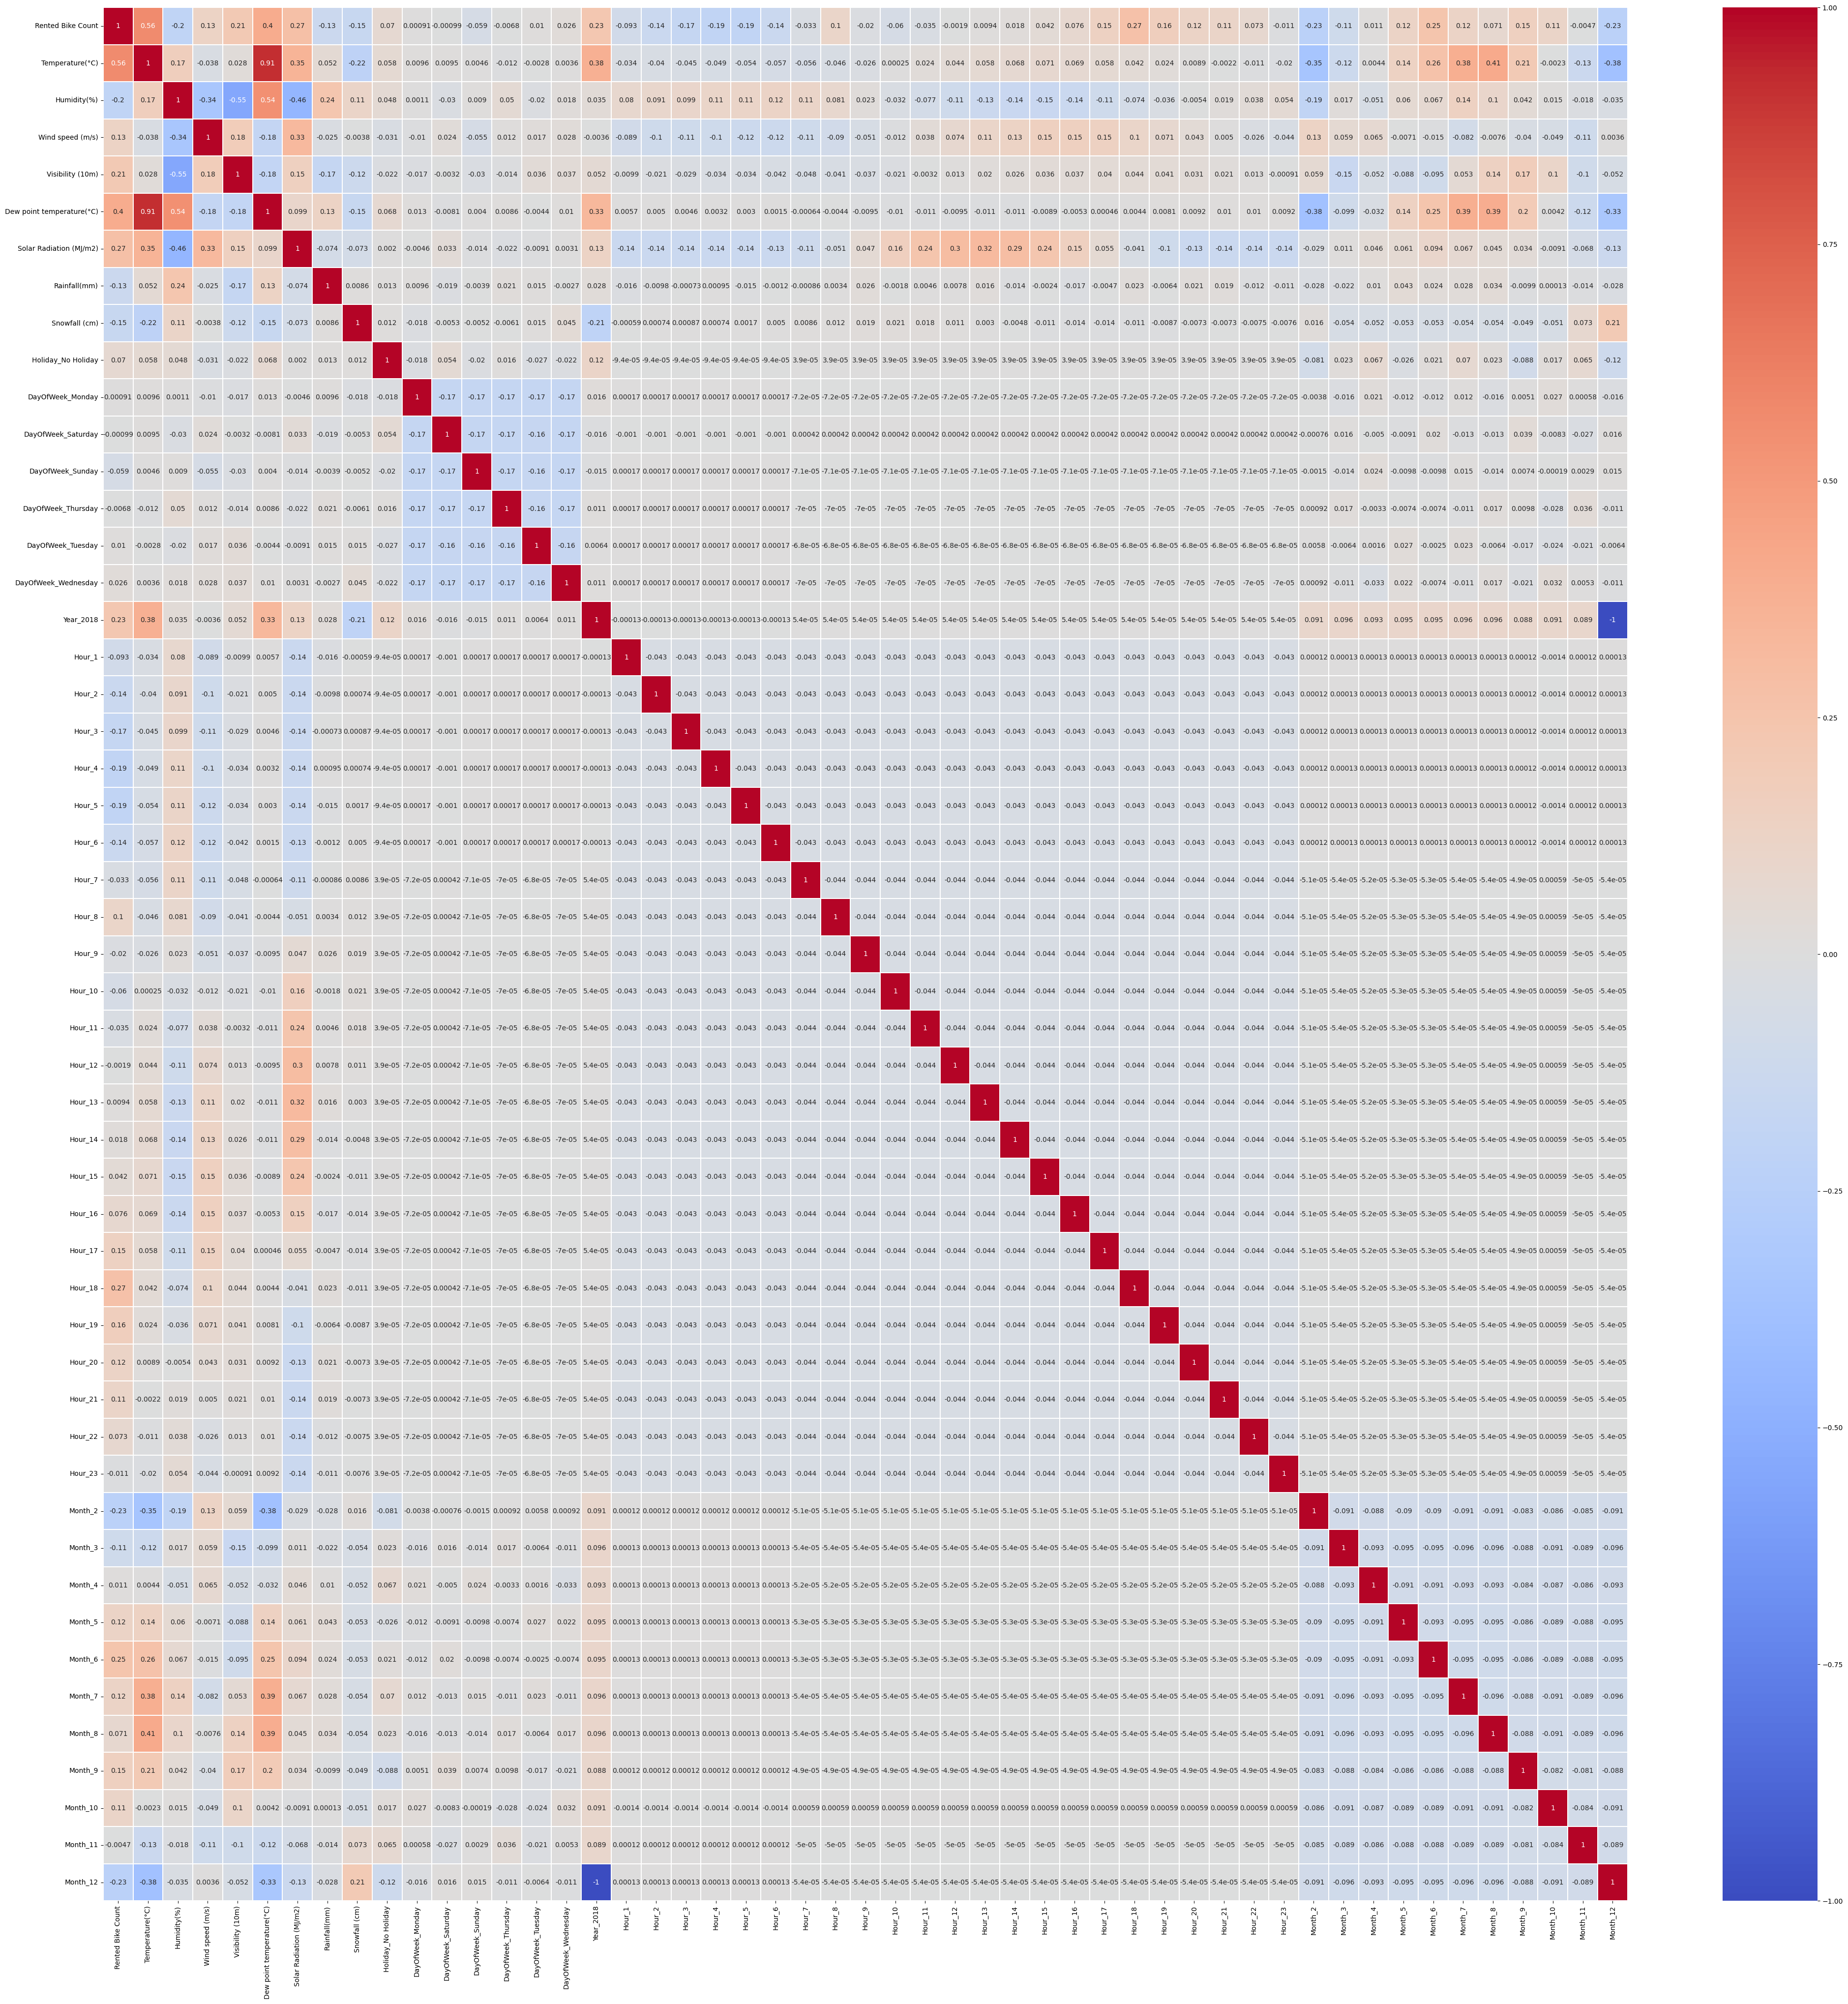

In [267]:
data2_corr= data2.corr()
plt.figure(figsize=(50,50))

#cmap use for colour palette , linewidths : set the width of the lines that divide the cells,
#annot :helps in annotating the heatmap with values if set to True, otherwise values are not provided , linecolor : helps in setting the color of each line that divides heatmap cells
sns.heatmap(data2_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

Temperature and Dew point have high correlation and also, temperature has a higher correlation with target value, thus we omit Dew point from our dataset here. And also here we have a negative Equality between two columns "Year2018" and "Month12", thus we omit one of them(Year_2018)

In [268]:
data2=data2.drop(['Dew point temperature(°C)','Year_2018'], axis = 1)

In [269]:
features2 = data2.columns[data2.columns != 'Rented Bike Count']

In [270]:
features2list=data2[features2].columns.tolist()

In [271]:
features2list

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Holiday_No Holiday',
 'DayOfWeek_Monday',
 'DayOfWeek_Saturday',
 'DayOfWeek_Sunday',
 'DayOfWeek_Thursday',
 'DayOfWeek_Tuesday',
 'DayOfWeek_Wednesday',
 'Hour_1',
 'Hour_2',
 'Hour_3',
 'Hour_4',
 'Hour_5',
 'Hour_6',
 'Hour_7',
 'Hour_8',
 'Hour_9',
 'Hour_10',
 'Hour_11',
 'Hour_12',
 'Hour_13',
 'Hour_14',
 'Hour_15',
 'Hour_16',
 'Hour_17',
 'Hour_18',
 'Hour_19',
 'Hour_20',
 'Hour_21',
 'Hour_22',
 'Hour_23',
 'Month_2',
 'Month_3',
 'Month_4',
 'Month_5',
 'Month_6',
 'Month_7',
 'Month_8',
 'Month_9',
 'Month_10',
 'Month_11',
 'Month_12']

In [272]:
x2 = data2[features2]
y2 = data2['Rented Bike Count']

In [273]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(x2, y2, test_size = 0.3, random_state = 42)
sd2=StandardScaler()
X_train2 = sd2.fit_transform(X_train2)
X_test2 = sd2.transform(X_test2)

In [274]:
pipeline = Pipeline([ ('scaler', StandardScaler()), ('model', Lasso()) ])
search2 = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,3,0.1)},
                      cv = 5,
                      scoring = 'neg_mean_squared_error',
                      verbose = 3
                      )

In [275]:
search2.fit(X_train2, Y_train2)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV 1/5] END ............model__alpha=0.1;, score=-130564.020 total time=   0.1s
[CV 2/5] END ............model__alpha=0.1;, score=-125801.358 total time=   0.1s
[CV 3/5] END ............model__alpha=0.1;, score=-124280.590 total time=   0.1s
[CV 4/5] END ............model__alpha=0.1;, score=-125943.569 total time=   0.1s
[CV 5/5] END ............model__alpha=0.1;, score=-115678.177 total time=   0.1s
[CV 1/5] END ............model__alpha=0.2;, score=-130533.644 total time=   0.1s
[CV 2/5] END ............model__alpha=0.2;, score=-125804.503 total time=   0.1s
[CV 3/5] END ............model__alpha=0.2;, score=-124293.864 total time=   0.1s
[CV 4/5] END ............model__alpha=0.2;, score=-125933.469 total time=   0.1s
[CV 5/5] END ............model__alpha=0.2;, score=-115710.838 total time=   0.1s
[CV 1/5] END model__alpha=0.30000000000000004;, score=-130508.254 total time=   0.1s
[CV 2/5] END model__alpha=0.300000000000000

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [276]:
search2.best_params_

{'model__alpha': 0.1}

In [277]:
coef2 = search2.best_estimator_[1].coef_

In [278]:
coef2

array([ 3.31705776e+02, -1.34994685e+02,  4.25516702e+00,  2.70830058e+01,
        3.10240064e+01, -7.00524613e+01,  1.06961865e+01,  3.16848345e+01,
       -1.43807370e+01, -3.03391089e+01, -4.91291602e+01, -5.99911372e+00,
       -4.38693180e+00,  2.43965163e-02, -1.90579055e+01, -4.08456543e+01,
       -6.11100250e+01, -6.82856032e+01, -6.61361633e+01, -3.56901938e+01,
        2.86821854e+01,  1.10577533e+02,  1.14157287e+01, -3.28891152e+01,
       -3.23048020e+01, -2.43121514e+01, -2.39124333e+01, -3.21497075e+01,
       -1.60765949e+01,  1.20601174e+01,  6.48407256e+01,  1.64075897e+02,
        1.04518128e+02,  8.64725440e+01,  8.82320101e+01,  6.93845743e+01,
        2.17496642e+01, -1.34411013e+01,  1.95996403e+01,  3.80855901e+01,
        8.22394552e+01,  1.16894770e+02,  1.03837056e+01, -3.37993497e+01,
        6.56574766e+01,  1.02089843e+02,  7.24824893e+01,  1.83588256e+01])

No discarded columns
<br> Now going to perform linear regression

In [279]:
reg2= LinearRegression()
reg2.fit(X_train2, Y_train2)
y_pred2 = reg2.predict(X_test2)

In [280]:
r2reg_2 = r2_score(Y_test2, y_pred2)
n = len(Y_test2)
p = X_test2.shape[1]
adjr2reg_2 = 1 - (((1 - r2reg_2) * (n - 1)) / (n - p - 1))
msereg_2 = mean_squared_error(Y_test2, y_pred2)

In [281]:
from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(reg2, X_train2, Y_train2, scoring='r2', cv=5)
scores2.mean()

0.7016193335695228

In [282]:
print(r2reg_2)
print(adjr2reg_2)
print(msereg_2)

0.6913711716056075
0.6854240886016207
123764.16931132364


In [283]:
Results_df.loc[1] = ['#2', msereg_2, r2reg_2, adjr2reg_2]

In [284]:
Results_df

,Condition No,MSE,R2,Adj_R2
0,#1,136824.245378,0.658803,0.653203
1,#2,123764.169311,0.691371,0.685424


In [285]:
#define model
model_RF = RandomForestRegressor()


#define model evaluation method
cv = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 1)

param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [40,50],
    'max_features': ['auto', 'sqrt'],
}

In [286]:
#define search
search2 = GridSearchCV(model_RF, param_grid=param_grid, scoring = 'neg_mean_absolute_error', cv = cv, n_jobs = 2)

In [287]:
results2 = search2.fit(X_train2, Y_train2)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [288]:
results.best_params_

{'max_depth': 40, 'max_features': 'auto', 'n_estimators': 300}

this condition can be used with random forest too, thus we are going to perform random forest for this.

In [289]:
RF_model2 = RandomForestRegressor(n_estimators = 300, max_depth = 50, max_features= "sqrt" )
RF_model2.fit(X_train2, Y_train2)

RandomForestRegressor(max_depth=50, max_features='sqrt', n_estimators=300)

In [290]:
y_pred_rf2 = RF_model2.predict(X_test2)

In [291]:
MSE_RF_2 = mean_squared_error(Y_test2, y_pred_rf2)
r2_RF_2 = r2_score(Y_test2, y_pred_rf2)

In [292]:
print(r2_RF_2)
print(MSE_RF_2)
adjr2_RF_2 = 1 - (((1 - r2_RF_2) * (n - 1)) / (n - p - 1))
print(adjr2_RF_2)

0.8814263706746291
47549.56564501531
0.8791415315708082


In [293]:
Results_df.loc[2] = ['#1-RF', MSE_RF_1, r2_RF_1, adjr2_RF_1]

Results_df.loc[3] = ['#2-RF', MSE_RF_2, r2_RF_2, adjr2_RF_2]


In [294]:
Results_df

,Condition No,MSE,R2,Adj_R2
0,#1,136824.245378,0.658803,0.653203
1,#2,123764.169311,0.691371,0.685424
2,#1-RF,47633.772504,0.881216,0.879267
3,#2-RF,47549.565645,0.881426,0.879142


# Condition #3: 3 Dummies For Hour, Season Based

<Axes: xlabel='Hour'>

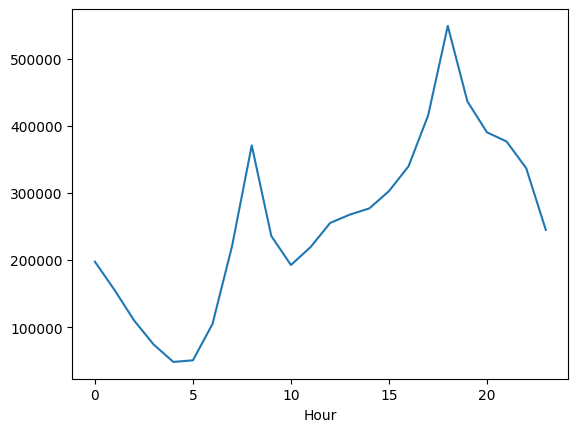

In [295]:
hourly_sum = data.groupby('Hour')['Rented Bike Count'].sum()
hourly_sum.plot()

In [296]:
#Dividing different hours based on their position between quartiles
quartiles = hourly_sum.quantile([0, 0.25, 0.5, 0.75, 1]).values
quartiles[0] = -float('inf')  # Set the first quartile to negative infinity
quartiles[-1] = float('inf')  # Set the last quartile to positive infinity
quartiles
labels = ['0-25', '25-50', '50-75', '75-100']

# Bin the hours into quartiles using cut
hour_bins = pd.cut(hourly_sum, bins=quartiles, labels=labels)
hour_bins


hour_dummies = pd.get_dummies(hour_bins, prefix='hour', drop_first=True)
hour_dummies = hour_dummies.astype(int)
hour_dummies

,hour_25-50,hour_50-75,hour_75-100
Hour,,,
0,1,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,1,0,0
8,0,0,1


In [297]:
data3 = data.merge(hour_dummies, on='Hour', how='left')
data3

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,DayOfWeek,Day,Month,Year,hour_25-50,hour_50-75,hour_75-100
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Friday,1,12,2017,1,0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Friday,1,12,2017,0,0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Friday,1,12,2017,0,0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Friday,1,12,2017,0,0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Friday,1,12,2017,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Friday,30,11,2018,0,0,1
8461,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Friday,30,11,2018,0,0,1
8462,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Friday,30,11,2018,0,0,1
8463,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Friday,30,11,2018,0,1,0


In [298]:
#Dummies
data3=pd.get_dummies(data3, columns=['Holiday','DayOfWeek','Year','Seasons'], drop_first=True, dtype=int)

In [299]:
#We have Dummies For Hour
data3=data3.drop(['Hour'], axis = 1)

In [300]:
data3=data3.drop(['Month','Day'], axis = 1)

In [301]:
data3.head(10)

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),hour_25-50,...,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Year_2018,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
1,204,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2,173,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
3,107,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,78,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
5,100,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
6,181,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
7,460,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
8,930,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
9,490,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1


<Axes: >

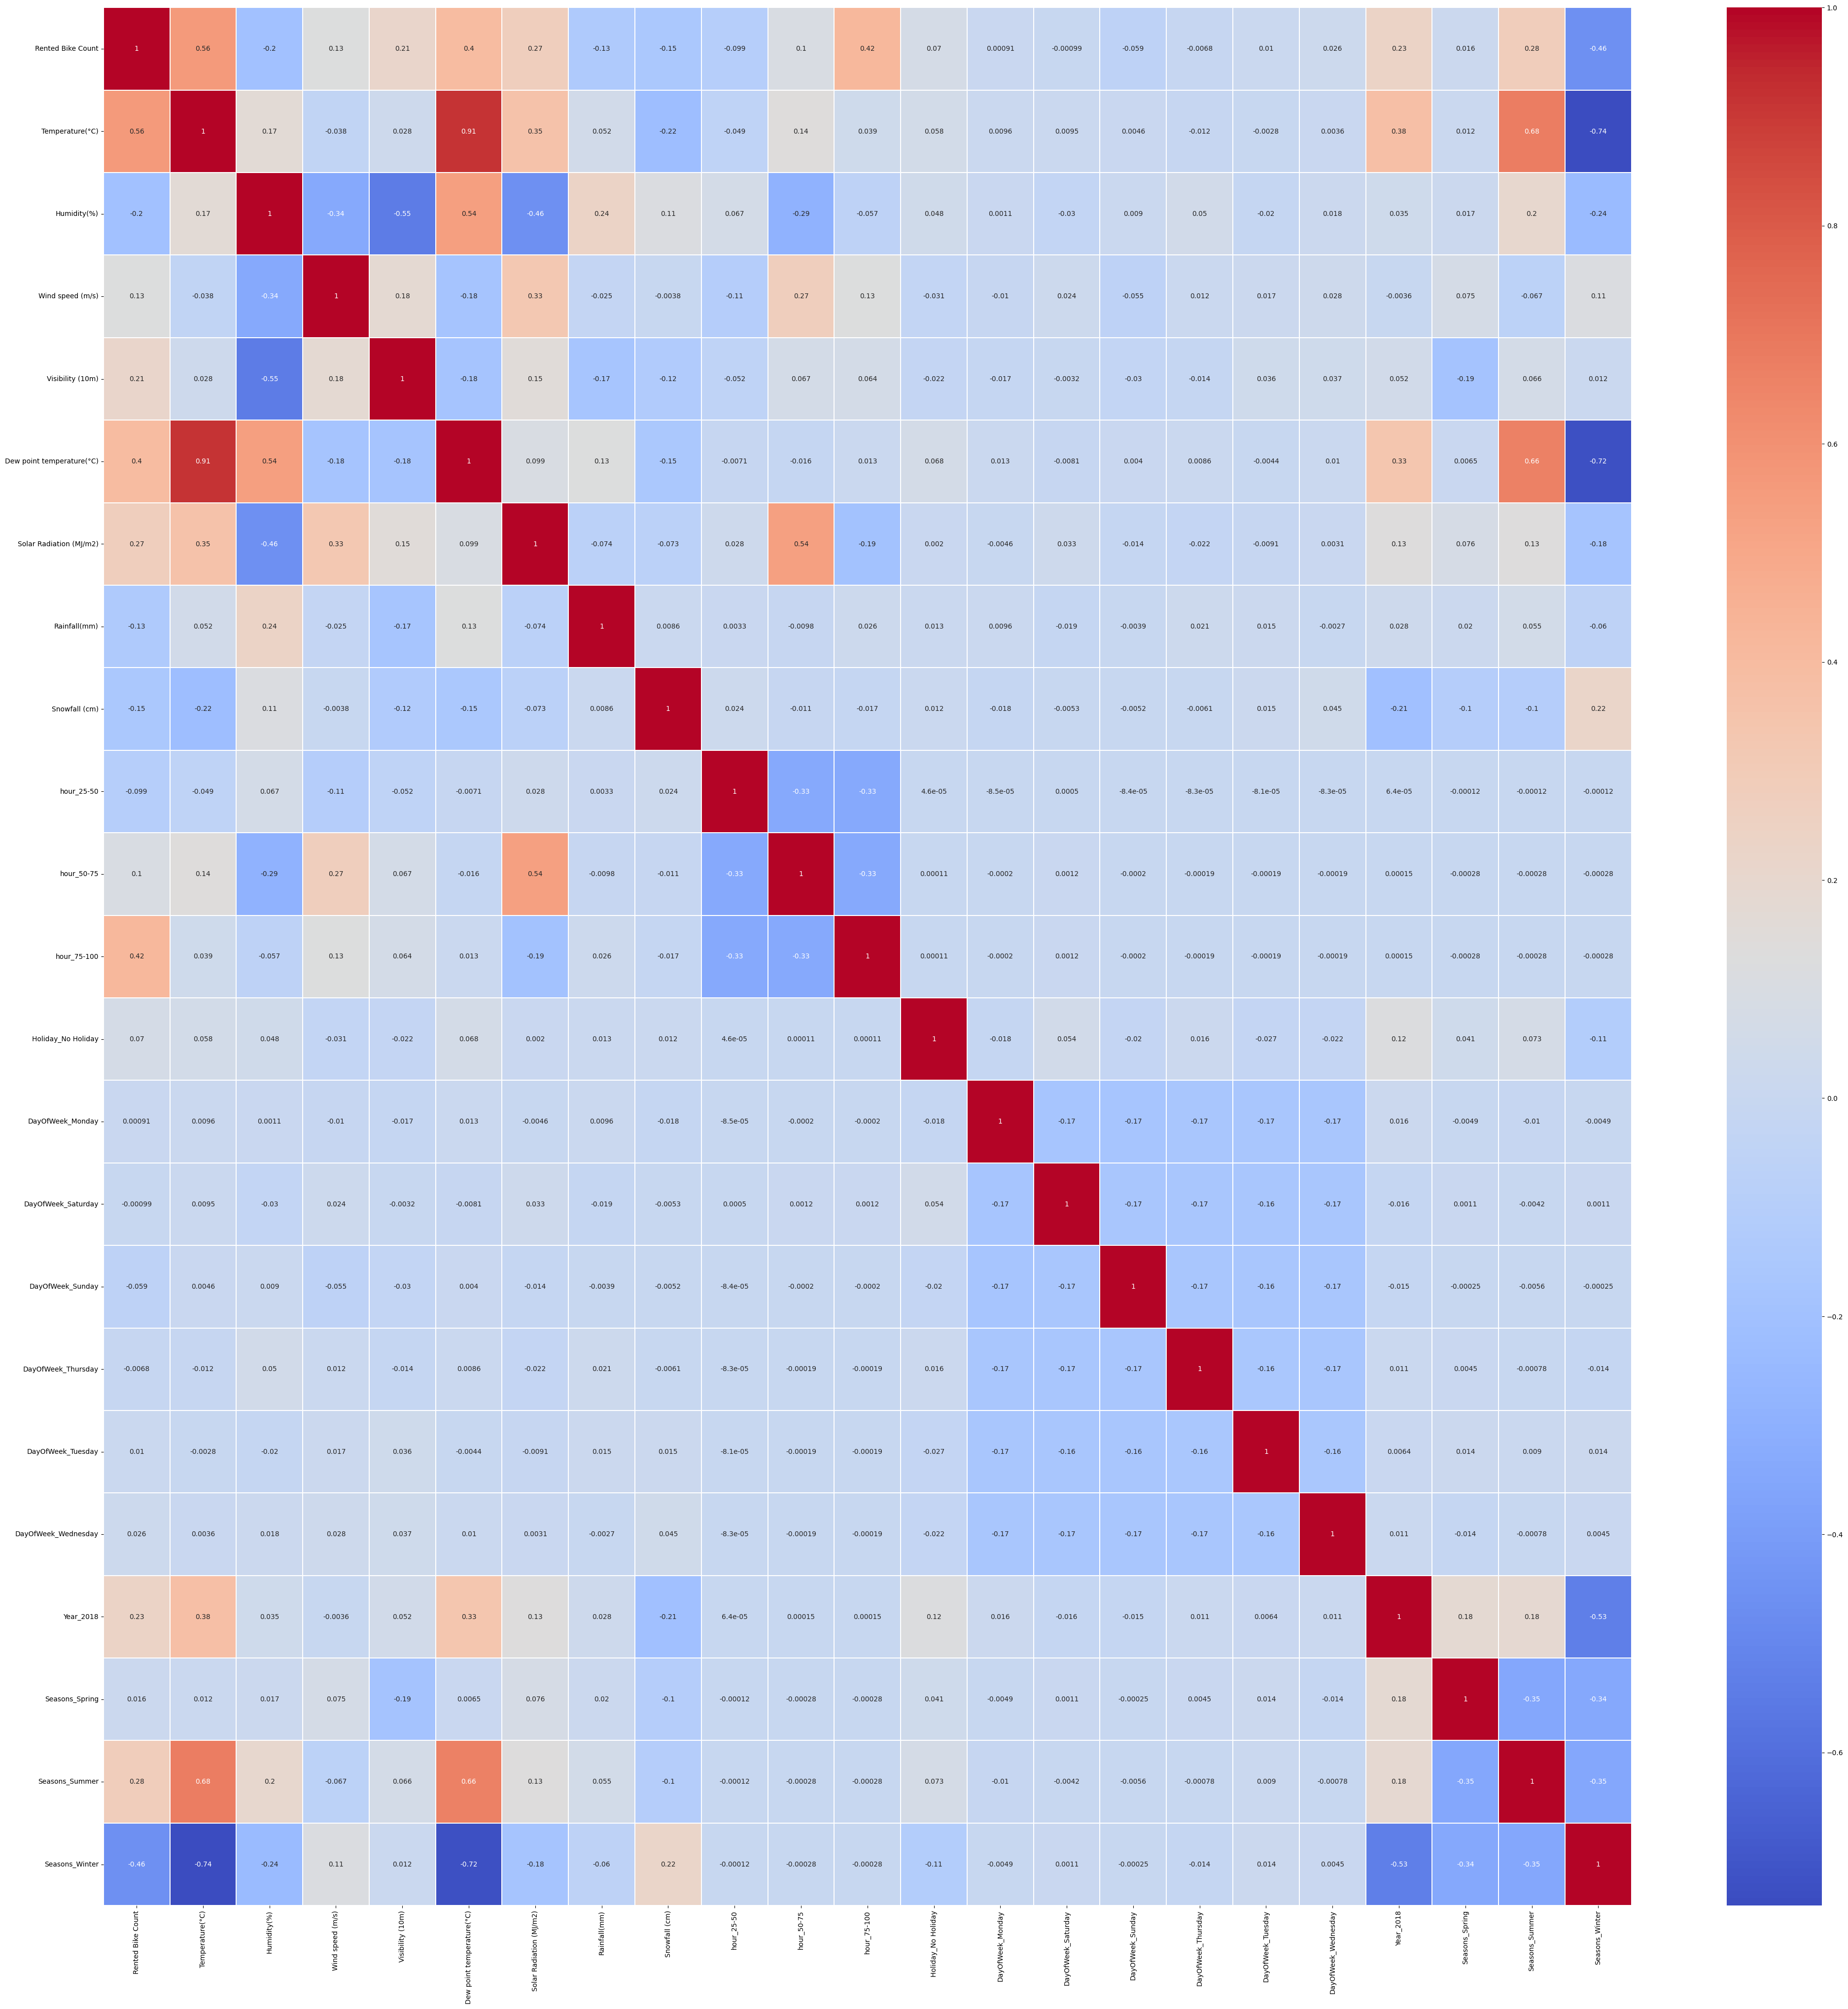

In [302]:
data3_corr= data3.corr()
plt.figure(figsize=(50,50))

#cmap use for colour palette , linewidths : set the width of the lines that divide the cells,
#annot :helps in annotating the heatmap with values if set to True, otherwise values are not provided , linecolor : helps in setting the color of each line that divides heatmap cells
sns.heatmap(data3_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

In [303]:
data3=data3.drop(['Dew point temperature(°C)'], axis = 1)

In [304]:
features3 = data3.columns[data3.columns != 'Rented Bike Count']

In [305]:
x3 = data3[features3]
y3 = data3['Rented Bike Count']

In [306]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(x3, y3, test_size = 0.3, random_state = 42)
sd3=StandardScaler()
X_train3 = sd2.fit_transform(X_train3)
X_test3 = sd2.transform(X_test3)

In [307]:
pipeline = Pipeline([ ('scaler', StandardScaler()), ('model', Lasso()) ])
search3 = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,3,0.1)},
                      cv = 5,
                      scoring = 'neg_mean_squared_error',
                      verbose = 3
                      )

In [308]:
search3.fit(X_train3, Y_train3)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV 1/5] END ............model__alpha=0.1;, score=-159532.856 total time=   0.0s
[CV 2/5] END ............model__alpha=0.1;, score=-164100.625 total time=   0.0s
[CV 3/5] END ............model__alpha=0.1;, score=-149434.266 total time=   0.0s
[CV 4/5] END ............model__alpha=0.1;, score=-158137.811 total time=   0.0s
[CV 5/5] END ............model__alpha=0.1;, score=-141398.628 total time=   0.0s
[CV 1/5] END ............model__alpha=0.2;, score=-159540.122 total time=   0.0s
[CV 2/5] END ............model__alpha=0.2;, score=-164066.507 total time=   0.0s
[CV 3/5] END ............model__alpha=0.2;, score=-149448.916 total time=   0.0s
[CV 4/5] END ............model__alpha=0.2;, score=-158129.469 total time=   0.0s
[CV 5/5] END ............model__alpha=0.2;, score=-141417.527 total time=   0.0s
[CV 1/5] END model__alpha=0.30000000000000004;, score=-159548.589 total time=   0.0s
[CV 2/5] END model__alpha=0.300000000000000

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [309]:
search3.best_params_

{'model__alpha': 0.2}

In [310]:
coef3 = search3.best_estimator_[1].coef_

In [311]:
coef3

array([ 307.32454821, -159.04614581,   -2.56596828,    4.80356395,
        -50.11141285,  -74.3889003 ,    6.57748678,  128.06050267,
        154.92323161,  343.42393201,   27.3771051 ,  -13.63898099,
        -26.73602881,  -49.39280654,   -7.96153048,   -3.86915631,
          5.6747629 ,  -23.6164876 ,  -55.9060103 ,  -60.59610226,
       -168.23098298])

No discarded columns
<br>Now going to perform linear regression

In [312]:
reg3= LinearRegression()
reg3.fit(X_train3, Y_train3)
y_pred3 = reg3.predict(X_test3)

In [313]:
r2reg_3 = r2_score(Y_test3, y_pred3)
n = len(Y_test3)
p = X_test3.shape[1]
adjr2reg_3 = 1 - (((1 - r2reg_3) * (n - 1)) / (n - p - 1))
msereg_3 = mean_squared_error(Y_test3, y_pred3)

In [314]:
scores3 = cross_val_score(reg3, X_train3, Y_train3, scoring='r2', cv=5)
scores3.mean()

0.6297768042771061

In [315]:
print(r2reg_3)
print(adjr2reg_3)
print(msereg_3)

0.6258671023291529
0.6227468517925812
150032.15199682929


In [316]:
Results_df.loc[4] = ['#3', msereg_3, r2reg_3, adjr2reg_3]

In [317]:
Results_df

,Condition No,MSE,R2,Adj_R2
0,#1,136824.245378,0.658803,0.653203
1,#2,123764.169311,0.691371,0.685424
2,#1-RF,47633.772504,0.881216,0.879267
3,#2-RF,47549.565645,0.881426,0.879142
4,#3,150032.151997,0.625867,0.622747


The result of 3-Dummy variable was significantly weaker than 23-Dummy one, thus we dont test it with seasons either

# ARIMA

In [318]:
#Creating Time-Series Table
data_For_Arima = pd.read_csv('SeoulBikeData.csv',encoding='latin1')

data_For_Arima['Date'] = pd.to_datetime(data_For_Arima['Date'], format='%d/%m/%Y')


data_For_Arima['DateTime'] = data_For_Arima['Date'] + pd.to_timedelta(data_For_Arima['Hour'], unit='h')


dfArima=data_For_Arima.copy()

dfArima

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,DateTime
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 00:00:00
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 01:00:00
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 02:00:00
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 03:00:00
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30 19:00:00
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30 20:00:00
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30 21:00:00
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018-11-30 22:00:00


In [319]:
dfArima.set_index('DateTime', inplace=True)
dfArima = dfArima[['Rented Bike Count']]

dfArima

,Rented Bike Count
DateTime,
2017-12-01 00:00:00,254
2017-12-01 01:00:00,204
2017-12-01 02:00:00,173
2017-12-01 03:00:00,107
2017-12-01 04:00:00,78
...,...
2018-11-30 19:00:00,1003
2018-11-30 20:00:00,764
2018-11-30 21:00:00,694


In [320]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import statsmodels.api as sm


#Performing Auto-ARIMA
#Doing Auto ARIMA

model=pm.auto_arima(dfArima, start_p=1, start_q=1,
                    test='adf',
                    max_q=5, max_p=5,
                    m=1,
                    d=None,
                    seasonal=False,
                    start_P=0,
                    D=0,
                    trace=True,
                    error_action='ignore',
                    suppress_warnings=True,
                    stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=122935.367, Time=0.85 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=145082.955, Time=0.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=123604.878, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=135785.198, Time=1.25 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=122930.469, Time=1.87 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=123054.706, Time=0.73 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=122915.381, Time=2.95 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=122922.214, Time=0.48 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=122906.838, Time=4.18 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=122907.861, Time=0.56 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=13.85 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=122253.346, Time=12.29 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=122645.274, Time=4.94 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=122219.927, Time=18.45 sec
 ARIMA(5,

In [321]:
#Spliting Test and Train Data

split_point= int(len(dfArima)*0.70)

Arima_Train=dfArima[:split_point]
Arima_Test=dfArima[split_point:]

In [322]:
#Performing Train and Test
order=(4,0,4)
train=sm.tsa.ARIMA(Arima_Train, order=order)
ARIMA_results=train.fit()
predictions= ARIMA_results.predict(start= len(Arima_Train), end=len(Arima_Train)+len(Arima_Test)-1, typ='levels')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

In [323]:
#Calculating MSE and R2
MSE_Arima = mean_squared_error(Arima_Test, predictions)
r2_Arima = r2_score(Arima_Test, predictions)

In [324]:
print(MSE_Arima)
print(r2_Arima)

452524.50739208766
-0.07777289681182564


In [325]:
Results_df.loc[5] = ['Arima', MSE_Arima, r2_Arima, "------"]

In [326]:
Results_df

,Condition No,MSE,R2,Adj_R2
0,#1,136824.245378,0.658803,0.653203
1,#2,123764.169311,0.691371,0.685424
2,#1-RF,47633.772504,0.881216,0.879267
3,#2-RF,47549.565645,0.881426,0.879142
4,#3,150032.151997,0.625867,0.622747
5,Arima,452524.507392,-0.077773,------


The leading model is the Random Forest, featuring Hour and Season-based dummies, exhibiting the highest adjusted R-squared and the lowest mean squared error (MSE) among the models evaluated.

# Methods to Prevent Overfitting in Transportation Planning Project

## 1. Cross-Validation
**Explanation:** Cross-validation involves splitting the dataset into subsets (folds), training the model on some subsets, and validating it on others. This technique helps evaluate the model's performance and generalization to unseen data.
  
**Implementation:** The code uses k-fold cross-validation techniques (`train_test_split` in combination with `cross_val_score`) to split the dataset into training and testing subsets and assess the model's performance.

## 2. Feature Selection
**Explanation:** Feature selection involves choosing the most relevant features and discarding irrelevant or redundant ones. This reduces model complexity and focuses on informative aspects of the data.
  
**Implementation:** The code performs feature selection by analyzing correlations (`sns.heatmap`) and discarding less influential features like 'Dew point temperature(°C)' based on their correlation with the target variable.

## 3. Hyperparameter Tuning
**Explanation:** Adjusting hyperparameters impacts the model's performance. Techniques like Grid Search (`GridSearchCV`) or Random Search help find the best hyperparameter combinations.
  
**Implementation:** Grid Search is used to find the best hyperparameters for models like Lasso Regression and Random Forest (`GridSearchCV` with various parameter values).

## 4. K-fold Validation
**Explanation:** K-fold validation involves dividing the dataset into 'k' subsets and training the model 'k' times, using different subsets for training and validation. It provides a robust estimate of model performance.
  
**Implementation:** The code utilizes k-fold validation (`cross_val_score`) to assess the model's performance after training it with different subsets.

## 5. Model-Specific Precautions
- For linear models like Lasso Regression, variations in feature encoding ('23 Dummies For Hour, Season Based' vs. '23 Dummies For Hour, Month Based') are tested to prevent overfitting.
- For Random Forest models, hyperparameters are optimized using Grid Search to prevent overfitting.

## 6. ARIMA Modeling
In time series analysis (ARIMA), the code uses auto-ARIMA to determine the best parameters for the model and fits an ARIMA model to the time series data.

## 7. Preprocessing Techniques
Standard scaling (`StandardScaler`) is applied to normalize the features before modeling to prevent features from dominating due to differences in scales.


In [135]:
%%html
<marquee style='width:100%; color: blue;'><b> <h1 style="color:black;font-family:tahoma;">Question #5 </h1></b></marquee>

In [327]:
#Importing prediction data
Prediction = pd.read_csv('PredictionData.csv',encoding='latin1')


In [328]:
Prediction

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2018,0,-4.3,55,1.6,1247,-12.7,0.00,0.0,0.0,Winter,Holiday,Yes
1,1/12/2018,1,-4.8,57,1.2,1219,-12.7,0.00,0.0,0.0,Winter,Holiday,Yes
2,1/12/2018,2,-5.5,56,1.4,1285,-12.9,0.00,0.0,0.0,Winter,Holiday,Yes
3,1/12/2018,3,-5.6,50,1.0,1367,-13.0,0.00,0.0,0.0,Winter,Holiday,Yes
4,1/12/2018,4,-5.9,51,1.1,1260,-12.2,0.00,0.0,0.0,Winter,Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,7/12/2018,19,-8.2,30,1.1,2000,-22.0,1.14,0.0,0.0,Winter,No Holiday,Yes
164,7/12/2018,20,-7.9,39,1.4,2000,-22.1,0.96,0.0,0.0,Winter,No Holiday,Yes
165,7/12/2018,21,-7.4,32,1.4,2000,-20.9,0.66,0.0,0.0,Winter,No Holiday,Yes
166,7/12/2018,22,-6.9,35,1.6,2000,-18.5,0.28,0.0,0.0,Winter,No Holiday,Yes


In [329]:
# Converting 'Date' column to datetime format and extracting day of the week

Prediction['Date'] = pd.to_datetime(Prediction['Date'], format='%d/%m/%Y')
Prediction['DayOfWeek'] = Prediction['Date'].dt.day_name()
Prediction2=Prediction.copy()


In [330]:
#Dividing Date
Prediction['Day']=Prediction['Date'].dt.day
Prediction['Month']=Prediction['Date'].dt.month
Prediction['Year']=Prediction['Date'].dt.year
#Omitting Main Date Column
Prediction.drop(columns=['Date'],inplace=True)


In [331]:
## Omitting unnecessary columns and creating dummy variables for relevant features
Prediction=pd.get_dummies(Prediction,columns=['Holiday','DayOfWeek','Year','Hour'], drop_first=True, dtype=int)
Prediction=pd.get_dummies(Prediction, columns=['Seasons'], drop_first=False, dtype=int)

In [332]:
Prediction.dtypes

Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Functioning Day               object
Day                            int64
Month                          int64
Holiday_No Holiday             int64
DayOfWeek_Monday               int64
DayOfWeek_Saturday             int64
DayOfWeek_Sunday               int64
DayOfWeek_Thursday             int64
DayOfWeek_Tuesday              int64
DayOfWeek_Wednesday            int64
Hour_1                         int64
Hour_2                         int64
Hour_3                         int64
Hour_4                         int64
Hour_5                         int64
Hour_6                         int64
Hour_7                         int64
Hour_8                         int64
Hour_9                         int64
H

In [333]:
#Omitting records of non-functioning days
Prediction=Prediction.drop(Prediction[Prediction['Functioning Day'] == 'No'].index)
Prediction2.drop(Prediction2[Prediction2['Functioning Day'] == 'No'].index)

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,DayOfWeek
0,2018-12-01,0,-4.3,55,1.6,1247,-12.7,0.00,0.0,0.0,Winter,Holiday,Yes,Saturday
1,2018-12-01,1,-4.8,57,1.2,1219,-12.7,0.00,0.0,0.0,Winter,Holiday,Yes,Saturday
2,2018-12-01,2,-5.5,56,1.4,1285,-12.9,0.00,0.0,0.0,Winter,Holiday,Yes,Saturday
3,2018-12-01,3,-5.6,50,1.0,1367,-13.0,0.00,0.0,0.0,Winter,Holiday,Yes,Saturday
4,2018-12-01,4,-5.9,51,1.1,1260,-12.2,0.00,0.0,0.0,Winter,Holiday,Yes,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2018-12-07,19,-8.2,30,1.1,2000,-22.0,1.14,0.0,0.0,Winter,No Holiday,Yes,Friday
164,2018-12-07,20,-7.9,39,1.4,2000,-22.1,0.96,0.0,0.0,Winter,No Holiday,Yes,Friday
165,2018-12-07,21,-7.4,32,1.4,2000,-20.9,0.66,0.0,0.0,Winter,No Holiday,Yes,Friday
166,2018-12-07,22,-6.9,35,1.6,2000,-18.5,0.28,0.0,0.0,Winter,No Holiday,Yes,Friday


In [334]:
#Omitting functioning date column
Prediction=Prediction.drop(['Functioning Day'], axis = 1)
Prediction2=Prediction2.drop(['Functioning Day'], axis = 1)

In [335]:
Prediction

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,...,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Winter
0,-4.3,55,1.6,1247,-12.7,0.00,0.0,0.0,1,12,...,0,0,0,0,0,0,0,0,0,1
1,-4.8,57,1.2,1219,-12.7,0.00,0.0,0.0,1,12,...,0,0,0,0,0,0,0,0,0,1
2,-5.5,56,1.4,1285,-12.9,0.00,0.0,0.0,1,12,...,0,0,0,0,0,0,0,0,0,1
3,-5.6,50,1.0,1367,-13.0,0.00,0.0,0.0,1,12,...,0,0,0,0,0,0,0,0,0,1
4,-5.9,51,1.1,1260,-12.2,0.00,0.0,0.0,1,12,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,-8.2,30,1.1,2000,-22.0,1.14,0.0,0.0,7,12,...,0,0,0,0,1,0,0,0,0,1
164,-7.9,39,1.4,2000,-22.1,0.96,0.0,0.0,7,12,...,0,0,0,0,0,1,0,0,0,1
165,-7.4,32,1.4,2000,-20.9,0.66,0.0,0.0,7,12,...,0,0,0,0,0,0,1,0,0,1
166,-6.9,35,1.6,2000,-18.5,0.28,0.0,0.0,7,12,...,0,0,0,0,0,0,0,1,0,1


In [336]:
Prediction=Prediction.drop(['Month','Day'], axis = 1)

In [337]:
Prediction

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday_No Holiday,DayOfWeek_Monday,...,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Winter
0,-4.3,55,1.6,1247,-12.7,0.00,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-4.8,57,1.2,1219,-12.7,0.00,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-5.5,56,1.4,1285,-12.9,0.00,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-5.6,50,1.0,1367,-13.0,0.00,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-5.9,51,1.1,1260,-12.2,0.00,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,-8.2,30,1.1,2000,-22.0,1.14,0.0,0.0,1,0,...,0,0,0,0,1,0,0,0,0,1
164,-7.9,39,1.4,2000,-22.1,0.96,0.0,0.0,1,0,...,0,0,0,0,0,1,0,0,0,1
165,-7.4,32,1.4,2000,-20.9,0.66,0.0,0.0,1,0,...,0,0,0,0,0,0,1,0,0,1
166,-6.9,35,1.6,2000,-18.5,0.28,0.0,0.0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [338]:
Prediction.dtypes

Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Holiday_No Holiday             int64
DayOfWeek_Monday               int64
DayOfWeek_Saturday             int64
DayOfWeek_Sunday               int64
DayOfWeek_Thursday             int64
DayOfWeek_Tuesday              int64
DayOfWeek_Wednesday            int64
Hour_1                         int64
Hour_2                         int64
Hour_3                         int64
Hour_4                         int64
Hour_5                         int64
Hour_6                         int64
Hour_7                         int64
Hour_8                         int64
Hour_9                         int64
Hour_10                        int64
Hour_11                        int64
Hour_12                        int64
H

In [339]:
Prediction=Prediction.drop(['Dew point temperature(°C)'], axis = 1)

In [340]:
Prediction

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday_No Holiday,DayOfWeek_Monday,DayOfWeek_Saturday,...,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Winter
0,-4.3,55,1.6,1247,0.00,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,-4.8,57,1.2,1219,0.00,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,-5.5,56,1.4,1285,0.00,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,-5.6,50,1.0,1367,0.00,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,-5.9,51,1.1,1260,0.00,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,-8.2,30,1.1,2000,1.14,0.0,0.0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
164,-7.9,39,1.4,2000,0.96,0.0,0.0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
165,-7.4,32,1.4,2000,0.66,0.0,0.0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
166,-6.9,35,1.6,2000,0.28,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [341]:
Prediction.dtypes

Temperature(°C)            float64
Humidity(%)                  int64
Wind speed (m/s)           float64
Visibility (10m)             int64
Solar Radiation (MJ/m2)    float64
Rainfall(mm)               float64
Snowfall (cm)              float64
Holiday_No Holiday           int64
DayOfWeek_Monday             int64
DayOfWeek_Saturday           int64
DayOfWeek_Sunday             int64
DayOfWeek_Thursday           int64
DayOfWeek_Tuesday            int64
DayOfWeek_Wednesday          int64
Hour_1                       int64
Hour_2                       int64
Hour_3                       int64
Hour_4                       int64
Hour_5                       int64
Hour_6                       int64
Hour_7                       int64
Hour_8                       int64
Hour_9                       int64
Hour_10                      int64
Hour_11                      int64
Hour_12                      int64
Hour_13                      int64
Hour_14                      int64
Hour_15             

In [342]:
# Ensure all required columns are present in the prediction data and handle missing columns

required_columns = features1list

missing_cols = set(required_columns) - set(Prediction.columns)
for col in missing_cols:
    Prediction[col] = 0  # Add missing columns and set their values to 0




In [343]:
Prediction

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday_No Holiday,DayOfWeek_Monday,DayOfWeek_Saturday,...,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Winter,Year_2018,Seasons_Spring,Seasons_Summer
0,-4.3,55,1.6,1247,0.00,0.0,0.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,-4.8,57,1.2,1219,0.00,0.0,0.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,-5.5,56,1.4,1285,0.00,0.0,0.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,-5.6,50,1.0,1367,0.00,0.0,0.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,-5.9,51,1.1,1260,0.00,0.0,0.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,-8.2,30,1.1,2000,1.14,0.0,0.0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
164,-7.9,39,1.4,2000,0.96,0.0,0.0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
165,-7.4,32,1.4,2000,0.66,0.0,0.0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
166,-6.9,35,1.6,2000,0.28,0.0,0.0,1,0,0,...,0,0,0,0,1,0,1,0,0,0


In [345]:
# Align the Prediction data with the columns used during training

aligned_prediction = Prediction[features1list]  # original_training_columns are the columns used in fitting sd1

transformed_prediction = sd1.transform(aligned_prediction)


In [346]:
# Use the trained Random Forest model to make predictions

predict=RF_model1.predict(transformed_prediction)

In [347]:
predict

array([174.72      , 184.51666667, 168.77666667, 123.25      ,
        79.74333333,  75.35666667, 114.67333333, 204.97333333,
       260.90666667, 177.47      , 177.80333333, 209.09      ,
       224.07333333, 224.18333333, 245.05333333, 251.21      ,
       265.36666667, 261.80333333, 445.56666667, 268.76666667,
       228.96      , 257.01666667, 246.89      , 258.54      ,
       227.75333333, 246.35333333, 223.26      , 203.98      ,
       162.62666667, 154.28666667, 173.35666667, 163.41666667,
       210.43333333, 165.68666667, 168.62      , 178.22666667,
       192.53333333, 198.52      , 214.91333333, 216.52333333,
       234.89333333, 271.66      , 387.52666667, 226.56333333,
       209.16      , 225.81666667, 255.77      , 255.35333333,
       259.09666667, 253.42333333, 239.85333333, 218.55333333,
       180.02      , 189.69333333, 244.00333333, 253.88666667,
       453.35      , 206.45      , 191.66      , 218.72      ,
       217.22666667, 245.26666667, 236.66666667, 236.79

In [348]:
Prediction2['Predictions'] = predict
Prediction2['Predictions'] = Prediction2['Predictions'].round().astype(int)


In [349]:
Prediction2

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,DayOfWeek,Predictions
0,2018-12-01,0,-4.3,55,1.6,1247,-12.7,0.00,0.0,0.0,Winter,Holiday,Saturday,175
1,2018-12-01,1,-4.8,57,1.2,1219,-12.7,0.00,0.0,0.0,Winter,Holiday,Saturday,185
2,2018-12-01,2,-5.5,56,1.4,1285,-12.9,0.00,0.0,0.0,Winter,Holiday,Saturday,169
3,2018-12-01,3,-5.6,50,1.0,1367,-13.0,0.00,0.0,0.0,Winter,Holiday,Saturday,123
4,2018-12-01,4,-5.9,51,1.1,1260,-12.2,0.00,0.0,0.0,Winter,Holiday,Saturday,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2018-12-07,19,-8.2,30,1.1,2000,-22.0,1.14,0.0,0.0,Winter,No Holiday,Friday,364
164,2018-12-07,20,-7.9,39,1.4,2000,-22.1,0.96,0.0,0.0,Winter,No Holiday,Friday,343
165,2018-12-07,21,-7.4,32,1.4,2000,-20.9,0.66,0.0,0.0,Winter,No Holiday,Friday,279
166,2018-12-07,22,-6.9,35,1.6,2000,-18.5,0.28,0.0,0.0,Winter,No Holiday,Friday,288


In [351]:
final_df=Prediction2[['Date','Predictions']]

In [352]:
final_df

,Date,Predictions
0,2018-12-01,175
1,2018-12-01,185
2,2018-12-01,169
3,2018-12-01,123
4,2018-12-01,80
...,...,...
163,2018-12-07,364
164,2018-12-07,343
165,2018-12-07,279
166,2018-12-07,288


In this DataFrame, the Random Forest predictions are derived from the combination of Hour and season dummies. The total count of rented bikes for each day is calculated by summing these predictions, which are aggregated across every hour throughout each year.

In [353]:
# Aggregate the predictions by date to get the total count of rented bikes for each day

final_df=final_df.groupby('Date').aggregate({'Predictions':'sum'})

In [354]:
final_df

,Predictions
Date,
2018-12-01,5130
2018-12-02,5169
2018-12-03,5905
2018-12-04,6476
2018-12-05,6119
2018-12-06,5473
2018-12-07,6567
